In [1]:
import numpy as np
from keras.utils import to_categorical


2022-09-30 07:49:55.349100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-30 07:49:55.571350: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-30 07:49:55.571390: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-30 07:49:55.621519: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-30 07:49:56.438249: W tensorflow/stream_executor/platform/de

# Load the data

In [2]:
# (x_train, y_train),(x_test,y_test) = cifar10.load_data()

import pickle
from keras.datasets import cifar10
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_data():
    x_train = []
    y_train = []

    # Iterate through all training batches, and load them in memory.
    for i in range(1, 6):
        path = "cifar-10-batches-py/data_batch_" + str(i)
        d = unpickle(path)
        # Add the training data to our datastructures.
        num_instances = len(d[b'data'])
        for j in range(0, num_instances):
            x_train.append(d[b'data'][j])
            y_train.append(d[b'labels'][j])


    x_test = []
    y_test = []

    # Load the test batch.
    path = "cifar-10-batches-py/test_batch"
    d = unpickle(path)
    # Add the testset to our datastructures.
    num_instances = len(d[b'data'])
    for j in range(0, num_instances):
        x_test.append(d[b'data'][j])
        y_test.append(d[b'labels'][j])

    train_len = len(x_train)
    test_len = len(x_test)

    return (np.stack(x_train).reshape(train_len,32,32,3), np.stack(y_train)), (np.stack(x_test).reshape(test_len,32,32,3) , np.stack(y_test))

In [7]:
NUM_CLASSES = 10
#(x_train, y_train), (x_test, y_test) = load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Number of training instances: " + str(len(x_train)))
print("Number of test instances: " + str(len(x_test)))


#x_train = x_train.astype('float32') / 255.0
#x_test = x_test.astype('float32') / 255.0


#y_train = to_categorical(y_train, NUM_CLASSES)
#y_test = to_categorical(y_test,NUM_CLASSES)

print(x_train[0][0])

Number of training instances: 50000
Number of test instances: 10000
[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


# Define the Model

In [5]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense

input_layer = Input(shape=(32,32,3))

x = Flatten()(input_layer)
x = Dense(units=200,activation='relu')(x)
x = Dense(units=150, activation='relu')(x)
output_layer = Dense(units=10,activation='softmax')(x)

model = Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


2022-09-29 20:19:53.346979: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-29 20:19:53.347064: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-29 20:19:53.347131: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mario-nb): /proc/driver/nvidia/version does not exist
2022-09-29 20:19:53.347648: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Compile and train the model

In [6]:
from keras.optimizers import Adam

opt = Adam(learning_rate=5e-4)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          shuffle=True)

Epoch 1/10


2022-09-29 20:19:58.658987: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 6s 3ms/step - loss: 1.8625 - accuracy: 0.3280
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6812 - accuracy: 0.3986
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6074 - accuracy: 0.4276
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5484 - accuracy: 0.4488
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5074 - accuracy: 0.4634
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4743 - accuracy: 0.4775
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4466 - accuracy: 0.4870
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4224 - accuracy: 0.4946
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4017 - accuracy: 0.5014
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3834 - accurac

In [8]:
model.evaluate(x_test,y_test)

  1/313 [..............................] - ETA: 43s - loss: 1.2306 - accuracy: 0.5312

2022-09-29 20:20:53.687611: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 1.4914 - accuracy: 0.4754


[1.4914183616638184, 0.47540000081062317]

In [9]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

In [10]:
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds,axis=-1)]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]
preds_single.shape

 62/313 [====>.........................] - ETA: 0s

2022-09-29 20:20:57.736256: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step


(10000,)

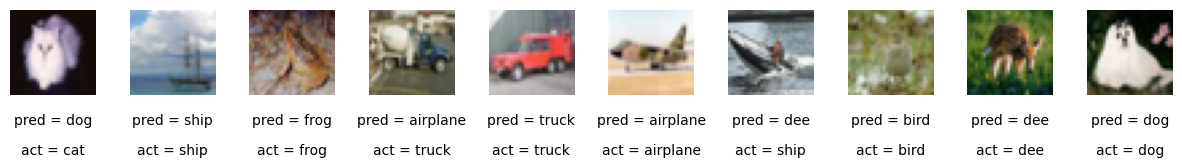

In [11]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [12]:
x_test[0]

array([[[0.61960787, 0.4392157 , 0.19215687],
        [0.62352943, 0.43529412, 0.18431373],
        [0.64705884, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254903, 0.14117648],
        [0.49411765, 0.35686275, 0.14117648],
        [0.45490196, 0.33333334, 0.12941177]],

       [[0.59607846, 0.4392157 , 0.2       ],
        [0.5921569 , 0.43137255, 0.15686275],
        [0.62352943, 0.44705883, 0.1764706 ],
        ...,
        [0.53333336, 0.37254903, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509805, 0.13333334]],

       [[0.5921569 , 0.43137255, 0.18431373],
        [0.5921569 , 0.42745098, 0.12941177],
        [0.61960787, 0.43529412, 0.14117648],
        ...,
        [0.54509807, 0.38431373, 0.13333334],
        [0.50980395, 0.37254903, 0.13333334],
        [0.47058824, 0.34901962, 0.12941177]],

       ...,

       [[0.26666668, 0.4862745 , 0.69411767],
        [0.16470589, 0.39215687, 0.5803922 ],
        [0.12156863, 0

In [14]:
x_test.shape

(10000, 32, 32, 3)